<a href="https://colab.research.google.com/github/samveddubey/Training-NN-in-GPU/blob/main/Training_Deep_NN_on_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch

In [40]:
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor


In [41]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader



In [42]:
dataset=MNIST(root='/data', download=True,transform=ToTensor())

In [43]:
len(dataset)
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [44]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [45]:
img, label=dataset[0]
img.shape, label


(torch.Size([1, 28, 28]), 5)

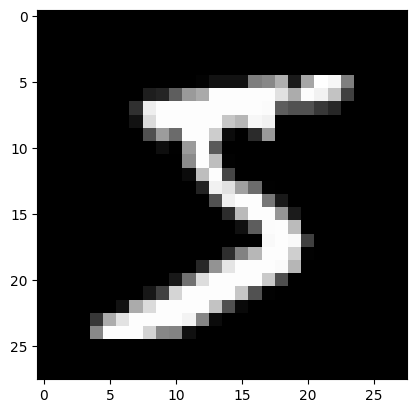

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0], cmap='gray')

In [47]:
img[0,10:15, 10:15]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

In [48]:
def split_indices(n, valpct):
  #n--- len of dataset
  #valpct--- percent of data to split
  nval=int(valpct*n)
   #-size of validation set
  indxs=np.random.permutation(n)
  return indxs[nval:],indxs[:nval]


In [49]:
train_indices, valid_indices=split_indices(len(dataset), valpct=0.2)

In [50]:
print(len(train_indices), len(valid_indices))


48000 12000


In [51]:
print(valid_indices[:20])

[51057 25275  4775 31027  8028 25092 25121  3228   816 52426 47186 47370
 17015 53125 48149 36204 31111 48294 16513 44259]


In [52]:
batch_size=100

train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)

val_sampler=SubsetRandomSampler(valid_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)


In [53]:
import torch.nn.functional as F
import torch.nn as nn


In [54]:
for xb,yb in train_loader:
  xb=xb.view(xb.size(0), -1)
  print(xb.shape)
  break



torch.Size([100, 784])


In [55]:
class mnistmodel(nn.Module):
  #feedforward neural network with 1 hidden layer
  def __init__(self, insize, hiddensize,outsize):
    super().__init__()
    #hidden layer
    self.linear1=nn.Linear(insize,hiddensize)
    #output layer
    self.linear2=nn.Linear(hiddensize,outsize)

  def forward(self , xb):
    #flatten the image tensors
    xb=xb.view(xb.size(0), -1)
    #get intermediate outputs
    out=self.linear1(xb)
    #apply activation function
    out=F.relu(out)
    #get predicitons using output layer
    out=self.linear2(out)
    return out

create a model which contains a hidden layer with 32 activations


In [56]:
insize=784
numclasses=10
model=mnistmodel(insize, hiddensize=32,outsize=numclasses)

one weight and one bias for each of the layers

In [57]:
for t in model.parameters():
  print(t.shape)


torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [58]:
for images, labels in train_loader:
  print(images.shape)
  outputs=model(images)
  lossfn=F.cross_entropy(outputs,labels)
  print('Loss:', lossfn.item())
  break
print(outputs.shape)
print('sample outputs \n', F.softmax(outputs[:2].data))

torch.Size([100, 1, 28, 28])
Loss: 2.300436019897461
torch.Size([100, 10])
sample outputs 
 tensor([[0.1062, 0.0791, 0.1096, 0.0976, 0.1099, 0.1164, 0.0881, 0.1127, 0.0871,
         0.0933],
        [0.1137, 0.0773, 0.1050, 0.1007, 0.1122, 0.1037, 0.0903, 0.1117, 0.0899,
         0.0957]])


<ipython-input-58-a4ffb401fe66>:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print('sample outputs \n', F.softmax(outputs[:2].data))


Using a GPU

In [59]:
torch.cuda.is_available()

True

In [60]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [61]:
device=get_default_device()
device

device(type='cuda')

In [62]:
def to_device(data, device):
  if isinstance(data, (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking=True)

In [63]:
for images,labels in train_loader:
  print(images.shape)
  images=to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cuda:0


In [64]:
class DeviceDataLoader():
  #wrap a dataloader to move data to device
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    #yield a batch of data after moving it to device
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    #no. of batches
    return len(self.dl)

In [65]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

Training the model


In [66]:
def loss_batch(model,lossfn,xb,yb,opt=None,metric=None):
  preds=model(xb)

  loss=lossfn(preds, yb)
  if opt is not None:
    loss.backwards
    opt.step()
    opt.zero_grad()
  metricresult=None
  if metric is not None:
    #compute the metric
    metricresult=metric(preds,yb)

  return loss.item(),len(xb),metricresult


In [67]:
def evaluate(model, lossfn, val_loader, metric=None):
    with torch.no_grad():
      results=[loss_batch(model, lossfn, xb, yb, metric=metric) for xb, yb in val_loader]
      losses, nums, metrics=zip(*results)
      total=np.sum(nums)
      avgloss=np.sum(np.multiply(losses,nums))/total
      avgmetric=None
      if metric is not None:
        avgmetric=np.sum(np.multiply(metrics,nums))/total
    return avgloss, total, metric

In [68]:
def fit(epochs , lr, model, lossfn, train_loader, val_loader, metric=None, opt_fn=None ):
  losses,metrics=[],[]
  if opt_fn is None:
    opt_fn=torch.optim.SGD
    opt=torch.optim.SGD(model.parameters(), lr=lr)

  for epochs in range(epochs):
    for xb,yb in train_loader:
      loss_batch(model ,lossfn, val_loader, metric)

    #evaluation
    result=evaluate(model, lossfn, val_loader, metric)
    val_loader, total, val_metric=result

    #record the loss and metric
    losses.append(val_loss)
    metrics.append(val_metric)

    return losses, metrics



In [69]:
def accuracy(outputs, labels):
  _,preds=torch.max(outputs, dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [70]:
model=mnistmodel(insize,hiddensize=32, outsize=numclasses)
to_device(model,device)

mnistmodel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [71]:
#val_loss, total, val_acc=evaluate(model, F.cross_entropy, val_loader, metric=accuracy)
#print('Loss: {:.4f} Accuracy: {:.4f}'.format(val_loss, val_acc))

TypeError: ignored

In [72]:
losses1, metrics1=fit(5, 0.5, model, F.cross_entropy, train_loader, val_loader, accuracy)

AttributeError: ignored